In [20]:
from event_parser import data_set
import CMS_analysis as ana
import cms_plotter as cms_plt
import matplotlib.pyplot as plt
import physics as phys
import vmath as vm
import numpy as np
import pandas as pd
import seaborn as sns

## General plot settings 

In [21]:
#Plot settings
hs = 'step'
lw = 1.5
nbins = 50
dns = True

### Settings for efficiency plot from CMS paper fig 22

In [22]:
#Keeping lxy cut because experimentally,this cut is essentially included at the trigger.
sigma = 0.15 #Not actually used for this figure
cuts = np.array([True, True, False, False, False, False, False])
lxy_edges = np.array([0., 2., 10., 24., 31., 110.])
pT_edges = np.array([3., 5., 8., 10., 15., 30., 50.])
paper_fig22 = np.array([[0.11, 0.51, 0.7, 0.69, 0.73, 0.72],
                       [0.14, 0.59, 0.7, 0.7, 0.66, 0.68],
                        [0.26, 0.55, 0.67, 0.69, 0.72, 0.66],
                        [0.28, 0.64, 0.71, 0.75, 0.74, 0.71],
                        [0.23, 0.63, 0.71, 0.74, 0.74, 0.68],
                       ]) #Values from the paper, for comparison

In [23]:
#Load a data set - lifetime generations are included below
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m8-ct10_mm05_big_set.npy")
dpB_a, muB_a, amuB_a, tracksB_a, jetsB_a = ana.prep_dataset(my_set)
dpB_b, muB_b, amuB_b, tracksB_b, jetsB_b = ana.prep_dataset(my_set)

Fill saved: --- 0.037767887115478516 seconds ---


In [24]:
print(muB_b.size())
new_events = np.arange(muB_b.size()) #So that each muon has an individual event
muB_a.event_index = new_events
amuB_a.event_index = new_events

400000


### In what follows, 
r = #muon pairs that are from an event with multiple pairs of muon
s = #muon pairs that are from an event with a single muon pair

In [25]:
final_dpB_a, final_muB_a, final_amuB_a, final_cutB_a, final_evt_cutB_a = ana.get_cms_eff(sigma, dpB_a, muB_a, amuB_a, tracksB_a, jetsB_a, cuts)

r: 0
s: 400000
Final: 210289 muon pairs
Ratio: 0.5257225
Analyze time: --- 0.382129430770874 seconds ---


In [26]:
final_dpB_b, final_muB_b, final_amuB_b, final_cutB_b, final_evt_cutB_b = ana.get_cms_eff(sigma, dpB_b, muB_b, amuB_b, tracksB_b, jetsB_b, cuts)

r: 400000
s: 0
Final: 305282 muon pairs
Ratio: 0.763205
Analyze time: --- 0.8019440174102783 seconds ---


In [27]:
rand_div = np.random.choice([0,1], size=200000,p=[0.5,0.5])
rand_div = np.array(rand_div, dtype=bool)
print(rand_div)
print(rand_div.shape[0])
eo_split = final_muB_a.create_even_odd_split()
print(eo_split)
print(eo_split.shape[0])
even_muB = final_muB_a.get(eo_split)
print(even_muB.size())
print(even_muB.event_index)
odd_muB = final_muB_a.get(~eo_split)
print(odd_muB.size())
print(odd_muB.event_index)
even_amuB = final_amuB_a.get(eo_split)
odd_amuB = final_amuB_a.get(~eo_split)
print(even_amuB.size())
even_evt_cut = final_evt_cutB_a[eo_split]
odd_evt_cut = final_evt_cutB_a[~eo_split]
print(even_evt_cut.shape[0])
print(even_evt_cut)
print(odd_evt_cut)

cf_evt_cut = np.append(even_evt_cut[rand_div], odd_evt_cut[~rand_div])
print(cf_evt_cut.shape[0])
print(cf_evt_cut)
#cf = correlation free
cf_muB = even_muB.get(rand_div).append(odd_muB.get(~rand_div))
cf_amuB = even_amuB.get(rand_div).append(odd_amuB.get(~rand_div))
print(cf_muB.size())
print(cf_amuB.size())

[ True  True False ... False False  True]
200000
[ True False  True ... False  True False]
400000
200000
[     0      2      4 ... 399994 399996 399998]
200000
[     1      3      5 ... 399995 399997 399999]
200000
200000
[ True False False ...  True False False]
[ True  True  True ...  True  True  True]
200000
[ True False False ...  True  True  True]
200000
200000


In [28]:
print(rand_div)

[ True  True False ... False False  True]


In [29]:
min_pTB_a = np.minimum(final_muB_a.pT, final_amuB_a.pT)
lxy_divsB_a = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB_a))
pT_divsB_a = cms_plt.get_eff_divs(pT_edges, min_pTB_a)

In [30]:
min_pTB_b = np.minimum(final_muB_b.pT, final_amuB_b.pT)
lxy_divsB_b = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB_b))
pT_divsB_b = cms_plt.get_eff_divs(pT_edges, min_pTB_b)

In [31]:
min_cf_pTB = np.minimum(cf_muB.pT, cf_amuB.pT)
cf_lxy_divsB = cms_plt.get_eff_divs(lxy_edges, phys.lxy(cf_muB))
cf_pT_divsB = cms_plt.get_eff_divs(pT_edges, min_cf_pTB)

### Print total and remaining number of remaining muons used in efficiency plots
#### Bins full enough for a good plot ~ at least 100

In [32]:
remB_a, totsB_a = cms_plt.get_n_eff(lxy_divsB_a, pT_divsB_a, final_evt_cutB_a)
print(remB_a)
print(totsB_a)

[[ 7847. 14477.  9793. 22796. 43867.  9207.]
 [ 1460.  2731.  1786.  3942.  6572.  1169.]
 [ 3694.  7117.  4424.  9465. 15874.  2674.]
 [ 2772.  5241.  3161.  6657. 10601.  1733.]
 [  825.  1538.   934.  1801.  2797.   448.]]
[[12760. 18796. 12434. 28359. 52873. 10607.]
 [ 2500.  3627.  2317.  4980.  7979.  1371.]
 [ 7002.  9761.  5778. 12066. 19209.  3106.]
 [ 6066.  7472.  4149.  8491. 12942.  1968.]
 [ 2077.  2188.  1232.  2275.  3408.   503.]]


In [33]:
remB_b, totsB_b = cms_plt.get_n_eff(lxy_divsB_b, pT_divsB_b, final_evt_cutB_b)
print(remB_b)
print(totsB_b)

[[10234. 16525. 11039. 25314. 47224.  9605.]
 [ 1953.  3160.  2043.  4444.  7117.  1237.]
 [ 5322.  8464.  5104. 10729. 17148.  2798.]
 [ 4346.  6391.  3643.  7549. 11543.  1799.]
 [ 1397.  1875.  1089.  2032.  3042.   465.]]
[[12760. 18796. 12434. 28359. 52873. 10607.]
 [ 2500.  3627.  2317.  4980.  7979.  1371.]
 [ 7002.  9761.  5778. 12066. 19209.  3106.]
 [ 6066.  7472.  4149.  8491. 12942.  1968.]
 [ 2077.  2188.  1232.  2275.  3408.   503.]]


In [34]:
cf_remB, cf_totsB = cms_plt.get_n_eff(cf_lxy_divsB, cf_pT_divsB, cf_evt_cut)
print(cf_remB)
print(cf_totsB)

[[ 3909.  7192.  4875. 11466. 21898.  4613.]
 [  744.  1344.   894.  2019.  3237.   561.]
 [ 1851.  3510.  2222.  4672.  7992.  1344.]
 [ 1395.  2585.  1549.  3296.  5221.   884.]
 [  430.   791.   463.   909.  1431.   228.]]
[[ 6299.  9346.  6204. 14251. 26432.  5301.]
 [ 1300.  1799.  1162.  2531.  3944.   655.]
 [ 3509.  4830.  2897.  5964.  9704.  1593.]
 [ 3029.  3708.  2040.  4229.  6388.  1004.]
 [ 1031.  1129.   628.  1135.  1738.   256.]]


In [35]:
effB_a = remB_a/totsB_a
effB_b = remB_b/totsB_b
cf_effB = cf_remB/cf_totsB

## Recreation of Figure 22. 
Filled entirely with H->Z,Z model where m = 8 and ct = 10.

### First comparison: Running all muon pairs through as if that pair were the only pair in the entire event vs. running all muon pairs through as if there were always two pairs per event.

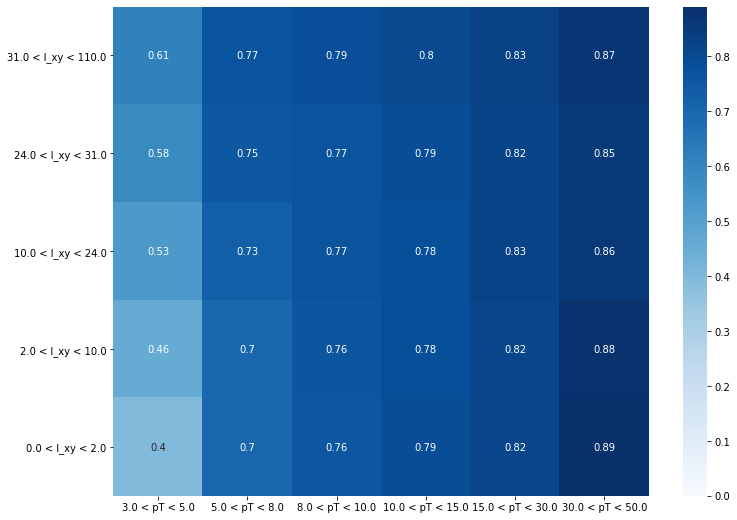

In [36]:
#A
cms_plt.create_eff_plot(lxy_edges, pT_edges, lxy_divsB_a, pT_divsB_a, final_evt_cutB_a, save=True, name="add_fig_22-a.png")

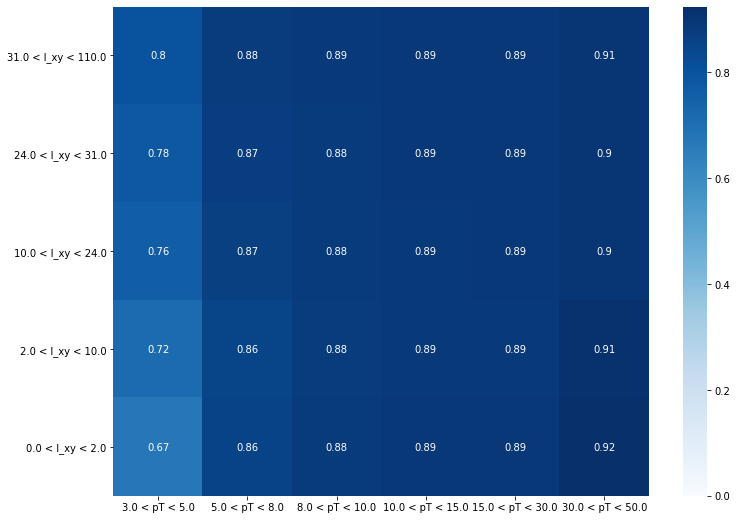

In [37]:
#B
cms_plt.create_eff_plot(lxy_edges, pT_edges, lxy_divsB_b, pT_divsB_b, final_evt_cutB_b,  save=True, name="add_fig_22-b.png")

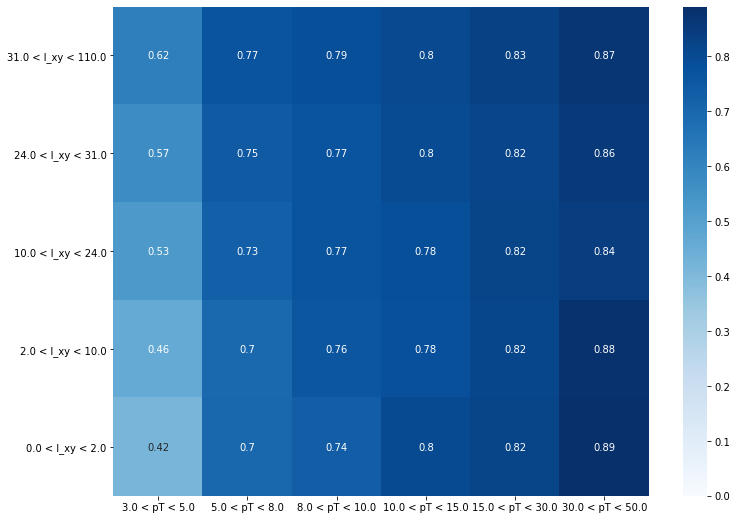

In [38]:
#CF
cms_plt.create_eff_plot(lxy_edges, pT_edges, cf_lxy_divsB, cf_pT_divsB, cf_evt_cut, save=True, name="add_fig_22-cf.png")

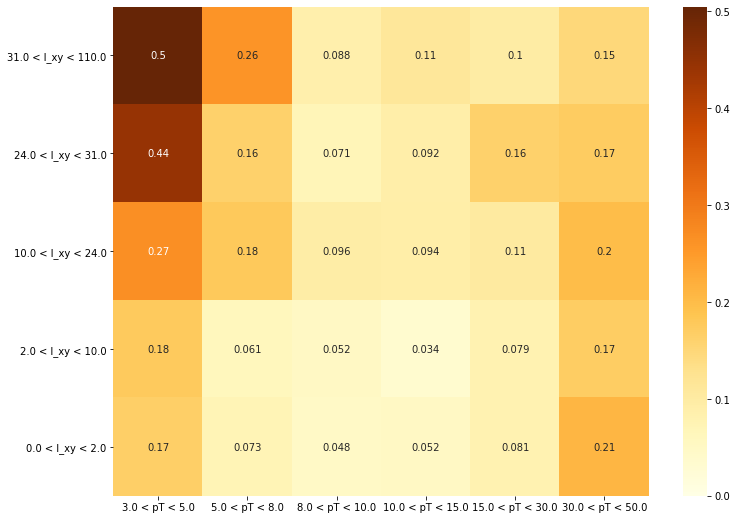

In [39]:
diffB_a = effB_a-paper_fig22
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, diffB_a, 2, save=True, name="../images/add_fig_22-diff-a.png")

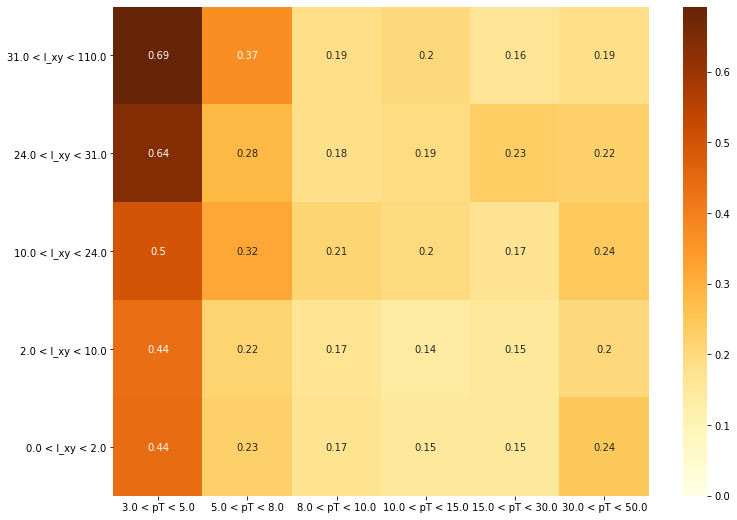

In [40]:
diffB_b = effB_b-paper_fig22
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, diffB_b, 2, save=True, name="../images/add_fig_22-diff-b.png")

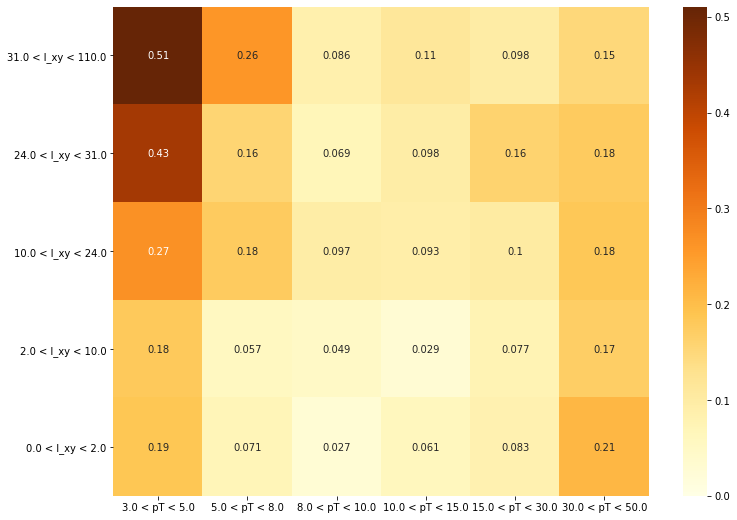

In [41]:
cf_diffB = cf_effB-paper_fig22
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, cf_diffB, 2, save=True, name="../images/add_fig_22-diff-cf.png")

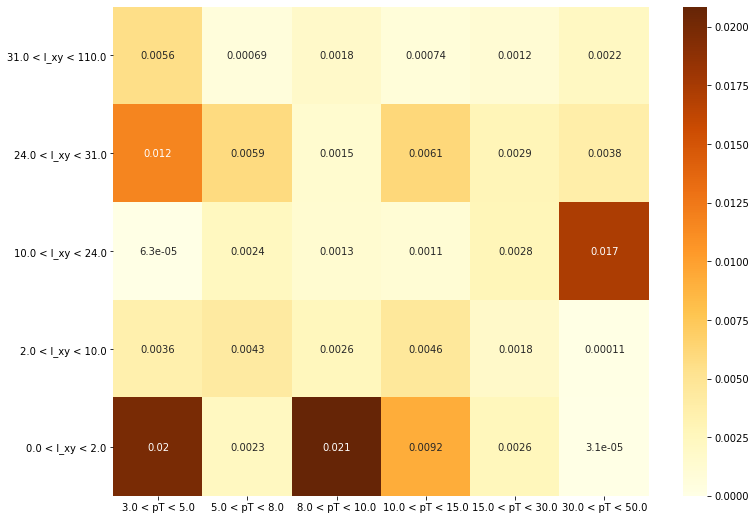

In [42]:
#Comparing the difference between the "correlation free" run and 
#the run where all muon pairs were analyzed as solo events.
cf_diffB_single = np.abs(cf_effB-effB_a)
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, cf_diffB_single, 2, save=False, name="../images/add_fig_22-diff.png")

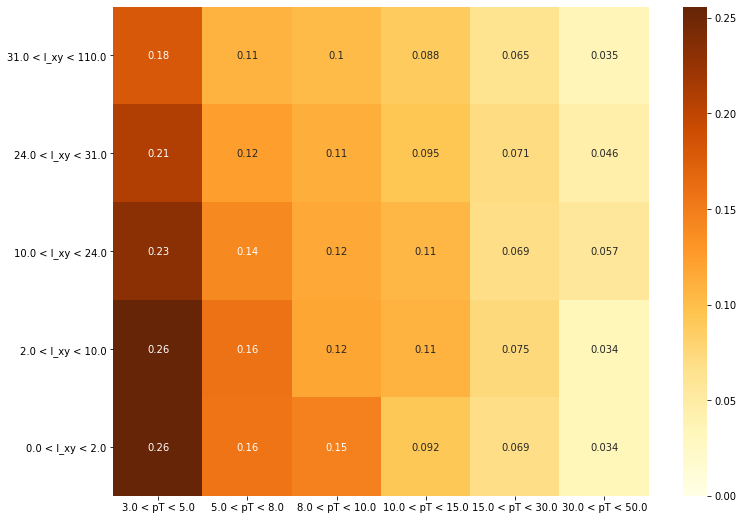

In [43]:
#Comparing the difference between the "correlation free" run and 
#the run where all muon pairs were analyzed as pair events.
cf_diffB_pair = np.abs(cf_effB-effB_b)
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, cf_diffB_pair, 2, save=False, name="../images/add_fig_22-diff.png")

In [44]:
### New settings 

In [45]:
sigma = 0.15 
lxy_edges = np.array([0., 2., 10., 24., 31., 70., 110.])
pT_edges = np.array([0., 10., 25., 50.])
cuts = np.array([True, True, False, True, True, True, True])
paper_fig24 = np.array([[0.85, 0.83, 0.81],
                       [0.82, 0.81, 0.81],
                        [0.75, 0.76, 0.76],
                        [0.81, 0.8, 0.84],
                        [0.59, 0.7, 0.83],
                         [0.36, 0.45, 0.45],
                       ])

In [46]:
### Add two versions of set G for making plot 24

In [47]:
my_set.fill_saved("../data_arrays/events_B_to_LLP-m4-ct10_mm12_set.npy") 

Fill saved: --- 0.002178668975830078 seconds ---


In [48]:
dpG_a, muG_a, amuG_a, tracksG_a, jetsG_a = ana.prep_dataset(my_set)
dpG_b, muG_b, amuG_b, tracksG_b, jetsG_b = ana.prep_dataset(my_set)

In [49]:
### Set events such that each muon pair comes from
### a different event
new_events = np.arange(muG_a.size()) 
muG_a.event_index = new_events
amuG_a.event_index = new_events

In [54]:
final_dpG_a, final_muG_a, final_amuG_a, final_cutG_a, final_evt_cutG_a = ana.get_cms_eff(sigma, dpG_a, muG_a, amuG_a, tracksG_a, jetsG_a, cuts)

r: 0
s: 10731
Final: 8952 muon pairs
Ratio: 0.8342186189544311
Analyze time: --- 0.014984846115112305 seconds ---


In [ ]:
final_muG_a = final_muG_a.get(final_evt_cutG_a)
final_amuG_a = final_amuG_a.get(final_evt_cutG_a)
final_cutG_a = final_cutG_a[final_evt_cutG_a]

In [ ]:
final_dpG_b, final_muG_b, final_amuG_b, final_cutG_b, final_evt_cutG_b = ana.get_cms_eff(sigma, dpG_b, muG_b, amuG_b, tracksG_b, jetsG_b, cuts)

In [60]:
final_muG_b = final_muG_b.get(final_evt_cutG_b)
final_amuG_b = final_amuG_b.get(final_evt_cutG_b)
final_cutG_b = final_cutG_b[final_evt_cutG_b]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10491 but corresponding boolean dimension is 10731

In [61]:
final_dpB_a, final_muB_a, final_amuB_a, final_cutB_a, final_evt_cutB_a = ana.get_cms_eff(sigma, dpB_a, muB_a, amuB_a, tracksB_a, jetsB_a, cuts)

r: 0
s: 400000
Final: 173071 muon pairs
Ratio: 0.4326775
Analyze time: --- 0.5126338005065918 seconds ---


In [62]:
final_muB_a = final_muB_a.get(final_evt_cutB_a)
final_amuB_a = final_amuB_a.get(final_evt_cutB_a)
final_cutB_a = final_cutB_a[final_evt_cutB_a]

In [63]:
final_dpB_b, final_muB_b, final_amuB_b, final_cutB_b, final_evt_cutB_b = ana.get_cms_eff(sigma, dpB_b, muB_b, amuB_b, tracksB_b, jetsB_b, cuts)

r: 400000
s: 0
Final: 258561 muon pairs
Ratio: 0.6464025
Analyze time: --- 0.9201655387878418 seconds ---


In [64]:
final_muB_b = final_muB_b.get(final_evt_cutB_b)
final_amuB_b = final_amuB_b.get(final_evt_cutB_b)
final_cutB_b = final_cutB_b[final_evt_cutB_b]

In [65]:
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muG_a))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muG_a, final_amuG_a))

In [66]:
remG_a, totsG_a = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutG_a)

In [82]:
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muG_b))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muG_b, final_amuG_b))

In [83]:
remG_b, totsG_b = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutG_b)

In [84]:
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB_a))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muB_a, final_amuB_a))

In [85]:
remB_a, totsB_a = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutB_a)

In [86]:
lxy_divs = cms_plt.get_eff_divs(lxy_edges, phys.lxy(final_muB_b))
pT_divs = cms_plt.get_eff_divs(pT_edges, phys.comb_pT(final_muB_b, final_amuB_b))

In [87]:
remB_b, totsB_b = cms_plt.get_n_eff(lxy_divs, pT_divs, final_cutB_b)

In [88]:
effG_a = remG_a/totsG_a
effG_b = remG_b/totsG_b
effB_a = remB_a/totsB_a
effB_b = remB_b/totsB_b

In [89]:
eff_mid_mass_a = np.zeros((lxy_divs.shape[0], pT_divs.shape[0]))
eff_mid_mass_a[:,0] = effG_a[:,0]
eff_mid_mass_a[:,1] = effB_a[:,1]
eff_mid_mass_a[:,2] = effB_a[:,2]

In [90]:
eff_mid_mass_b = np.zeros((lxy_divs.shape[0], pT_divs.shape[0]))
eff_mid_mass_b[:,0] = effG_b[:,0]
eff_mid_mass_b[:,1] = effB_b[:,1]
eff_mid_mass_b[:,2] = effB_b[:,2]

## In this plot every pair of muons was run as if it were the only pair associated with that event

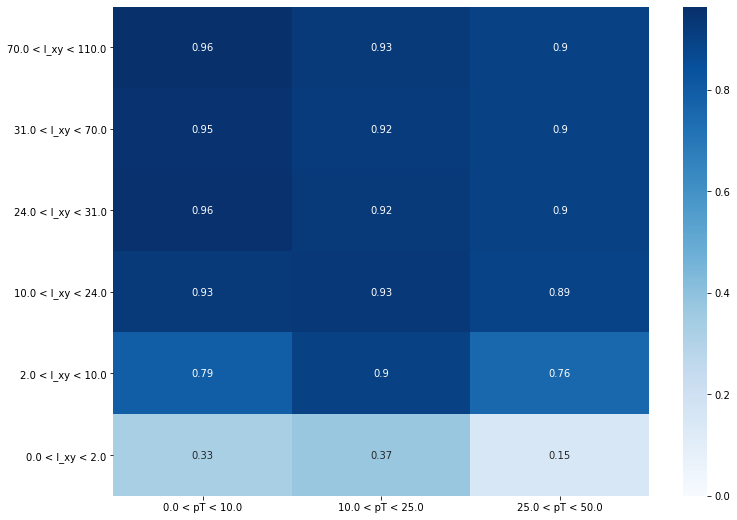

In [91]:
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, eff_mid_mass_a, 1, save=True, name="../images/add_fig_24-a.png")

## This plot is what my original code produces

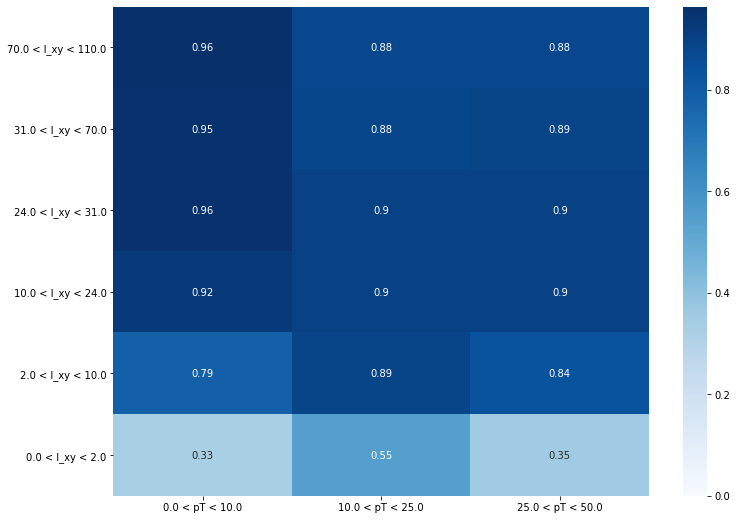

In [92]:
cms_plt.create_eff_plot_v2(lxy_edges, pT_edges, eff_mid_mass_b, 1, save=True, name="../images/add_fig_24-b.png")

In [93]:
## which model will we be using (question discussed today)
## euler - get everything running on euler
## maybe for now fix lifetime to 1cm
## masses: m_eta = lambda_QCD
## masses: m_omega = 2.5*lambda_QCD
## masses: m_omega = 0.4*lambda_QCD
## masses: lambda_QCD = steps(1Gev - 10Gev)

In [94]:
#NSF?
## Shelton, Essig, Gori, Curtin (what a dark photon is, how it communicates with SM)
## go through discussion of kinetic mixing (q)